### About

The Thomas Fire of December 2017 burned approximately 440 miles squared in Ventura and Santa Barbara counties. It was not fully contained until the the middle of January 2018. This fire had huge implications, as it displaced over 100,000 southern California residents, required the largest deployment of firefighters in California history to combat a wildfire, and cost over $200 million to fight.

To analyze the impact of the wildfire, we will look into the implications for air quality in the surrounding areas and how the vegetation was impacted using false color imagery.

### Highlights of analysis

- Datetime analysis

- Rolling average of AQI values

- Manipulation of xarray data

- False color imagery

### Dataset Descriptions

1. Air Quality Index (AQI) data from the US Environmental Protection Agency

https://www.epa.gov/outdoor-air-quality-data

2. Landsat Collection 2 Level-2 atmospherically collected surface reflectance data, collected by the Landsat 8 satellite 

https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2

3. California fire perimeter data from the US Department of the Interior

https://catalog.data.gov/dataset/california-fire-perimeters-all-b3436


### Data Analysis!

Before we do any analysis, our first step is always to read in our necessary libraries

In [2]:
import os

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

import xarray as xr
import rioxarray as rioxr

Now we can do our analysis! This first part includes cleaning the aqi data, evaluating the rolling average, and plotting our results.

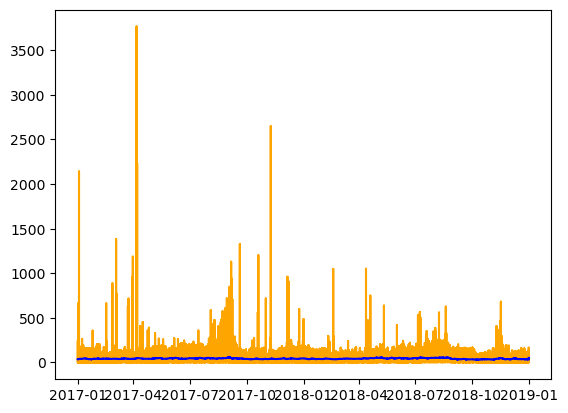

In [5]:
# Use the concat() function to combine the two dataframes
aqi = pd.concat([aqi_17, aqi_18])

# Simplify column names
aqi.columns = (aqi.columns
                  .str.lower()
                  .str.replace(' ','_'))

# Filter to data only from Santa Barbara county
aqi_sb = aqi[aqi['county_name'] == 'Santa Barbara']
# Drop state_name, county_name, state_code, and county_code columns from dataframe
aqi_sb = aqi.drop(['state_name','county_name','state_code','county_code'], axis = 1)

# Convert 'date' column to be of type datetime
aqi_sb.date = pd.to_datetime(aqi_sb['date'])
aqi_sb = aqi_sb.set_index('date')

# Calculate AQI rolling average over 5 days
aqi_sb = aqi_sb.sort_index(ascending=False)
rolling_average = aqi_sb['aqi'].rolling('5D').mean()

# Add a new column which includes the mean AQI for the 5 day rolling window 
aqi_sb['five_day_average'] = rolling_average

# Plot aqi and five_day_average
plt.plot(aqi_sb.index.values, aqi_sb['aqi'], color = "orange")
plt.plot(aqi_sb.index.values, aqi_sb['five_day_average'], color = "blue")

For the next part of our analysis, we are going to use false color imagery to map the fire. 

In [7]:
# Import landsat data
fp = os.path.join('data','landsat8-2018-01-26-sb-simplified.nc')
landsat = rioxr.open_rasterio(fp)

RasterioIOError: data/landsat8-2018-01-26-sb-simplified.nc: No such file or directory